<a href="https://colab.research.google.com/github/bhavyajethi/Deep-Learning-practice/blob/main/BIRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
Bidirectional_rnn = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, return_sequences=True))

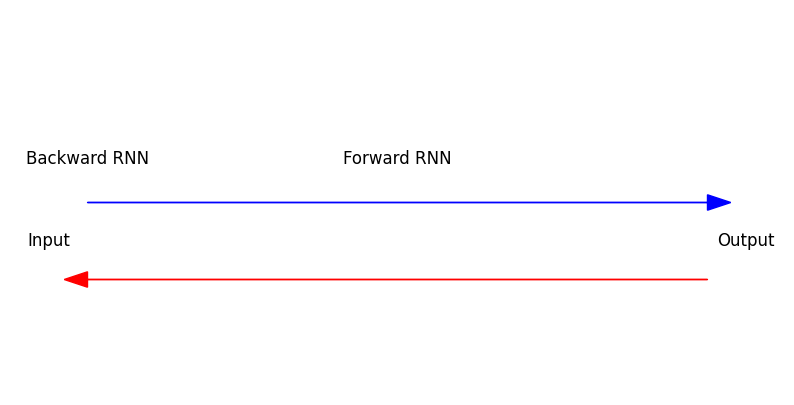

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_birnn():
  fig, ax = plt.subplots(figsize=(10,5))
  ax.set_xlim(0,10)
  ax.set_ylim(0,5)
  ax.axis('off')


  ax.arrow(1, 2.5, 8, 0, head_width=0.2, head_length=0.3, fc='b', ec='b')
  ax.arrow(9, 1.5, -8, 0, head_width=0.2, head_length=0.3, fc='r', ec='r')


  ax.text(5, 3, "Forward RNN", ha='center', fontsize='12')
  ax.text(1, 3, "Backward RNN", ha='center', fontsize='12')

  ax.text(0.5, 2, "Input", va="center", ha='center', fontsize='12')
  ax.text(9.5, 2, "Output", va="center", ha='center', fontsize='12')

  plt.show()

visualize_birnn()

In [ ]:
import tensorflow as tf

uni_rnn = tf.keras.layers.SimpleRNN(64, return_sequences=True)
bi_rnn = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, return_sequences=True))

x = tf.random.normal((1, 10, 32))

uni_op = uni_rnn(x)
bi_op = bi_rnn(x)

print(uni_op.shape)
print(bi_op.shape)

(1, 10, 64)
(1, 10, 128)


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_features = 10000
maxlen = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 128, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.6799 - loss: 0.5701 - val_accuracy: 0.8638 - val_loss: 0.3261
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9094 - loss: 0.2453 - val_accuracy: 0.8616 - val_loss: 0.3343
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9458 - loss: 0.1591 - val_accuracy: 0.8664 - val_loss: 0.3614
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9631 - loss: 0.1125 - val_accuracy: 0.8618 - val_loss: 0.3565
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9708 - loss: 0.0921 - val_accuracy: 0.8546 - val_loss: 0.4746
Test accuracy is , 0.8468


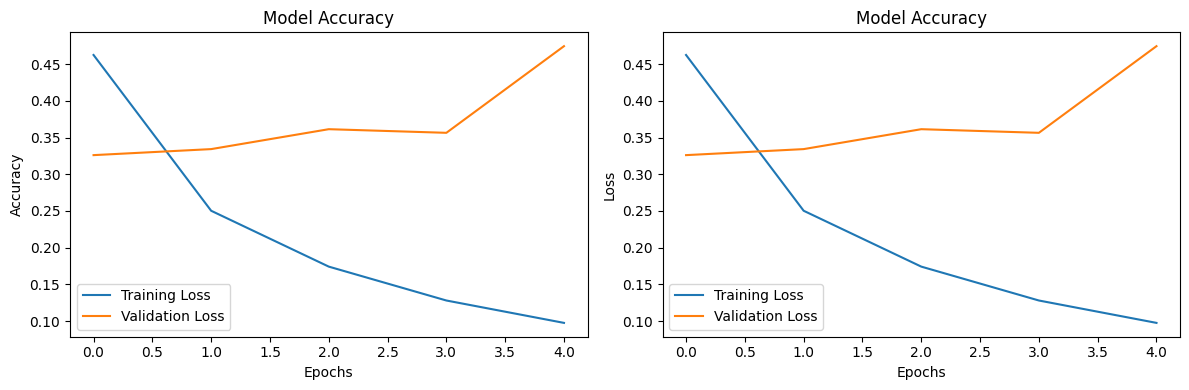

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, verbose=1, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy is , {test_acc:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/5
  2/157 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.9805 - loss: 0.0485 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9797 - loss: 0.0676 - val_accuracy: 0.8530 - val_loss: 0.4383
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9712 - loss: 0.0854 - val_accuracy: 0.8558 - val_loss: 0.4776
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9819 - loss: 0.0593 - val_accuracy: 0.8570 - val_loss: 0.5609
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9909 - loss: 0.0372 - val_accuracy: 0.8524 - val_loss: 0.5375
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9879 - loss: 0.0431 - val_accuracy: 0.8460 - val_loss: 0.6472
BiRNN accuracy is , 0.8468
UniRNN accuracy is , 0.8407


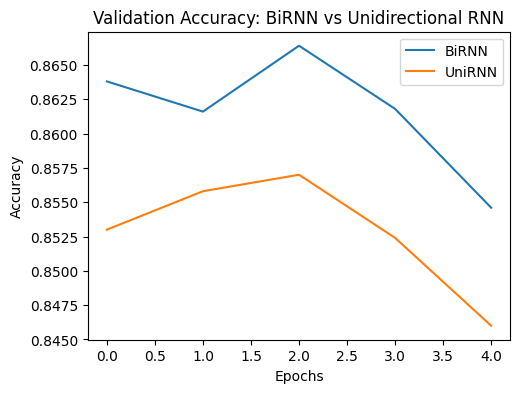

In [ ]:
uni_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 128, input_length = maxlen),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

uni_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

uni_history = model.fit(x_train, y_train, epochs=5, batch_size=128, verbose=1, validation_split=0.2)
uni_test_loss, uni_test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"BiRNN accuracy is , {test_acc:.4f}")
print(f"UniRNN accuracy is , {uni_test_acc:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='BiRNN')
plt.plot(uni_history.history['val_accuracy'], label='UniRNN')
plt.title("Validation Accuracy: BiRNN vs Unidirectional RNN")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Simulated NER data
sentences = [
    "John lives in New York",
    "Apple is headquartered in Cupertino",
    "The Eiffel Tower is in Paris"
]
labels = [
    ["B-PER", "O", "O", "B-LOC", "I-LOC"],
    ["B-ORG", "O", "O", "O", "B-LOC"],
    ["B-LOC", "I-LOC", "I-LOC", "O", "O", "B-LOC"]
]

# Create vocabularies
words = set([word for sentence in sentences for word in sentence.split()])
word_to_index = {word: index for index, word in enumerate(words)}
tag_to_index = {"O": 0, "B-PER": 1, "I-PER": 2, "B-LOC": 3, "I-LOC": 4, "B-ORG": 5, "I-ORG": 6}

# Encode sentences and labels
X = [[word_to_index[word] for word in sentence.split()] for sentence in sentences]
y = [[tag_to_index[tag] for tag in sentence_labels] for sentence_labels in labels]

# Pad sequences
max_len = max(len(sentence) for sentence in X)
X_padded = pad_sequences(X, maxlen=max_len, padding='post')
y_padded = pad_sequences(y, maxlen=max_len, padding='post', value=tag_to_index["O"])

# Convert to one-hot encoded labels
y_one_hot = tf.keras.utils.to_categorical(y_padded)

# Build the BiRNN model for NER
ner_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(word_to_index), 64, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(len(tag_to_index), activation='softmax'))
])

ner_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ner_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)